# <span style="color:green">SYMPHONY AI--> NLP Product Review Analysis: CPG </span>
-----------------------------------------------------------------------

<span style="color:blue">  ***Natural Language Processing – [ Datasets regarding products and reviews]*** </span>

<span style="color:blue">  **Retail/CPG - Datasets regarding products and reviews** </span>

-----------------------------------------------------------------------

import os
print(os.getcwd())

In [ ]:
import pandas as pd
path = "Reviews.csv"
df = pd.read_csv(path)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
import numpy as np                  #linear algebra
import pandas as pd                 # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt     #For Visualisation
%matplotlib inline
import seaborn as sns               #For better Visualisation
from bs4 import BeautifulSoup       #For Text Parsing

In [ ]:
df = df.dropna()
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568411.000000,568411.000000,568411.000000,568411.000000,5.684110e+05
mean,284227.440964,1.743874,2.227876,4.183309,1.296261e+09
std,164099.020907,7.636781,8.288752,1.310368,4.803792e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,142114.500000,0.000000,0.000000,4.000000,1.271290e+09
50%,284224.000000,0.000000,1.000000,5.000000,1.311120e+09
75%,426341.500000,2.000000,2.000000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.000000,5.000000,1.351210e+09


In [ ]:
a=[]
for i in df['Score']:
    if i <3:                              
        a.append(0)
    if i==3:
        a.append(1)
    if i>3:
        a.append(2)

len(a)      

568411

### Review sentiment:
-  0: Negative
-  1: Neutral
-  2: Positive

c:\users\rambaksh prajapati\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


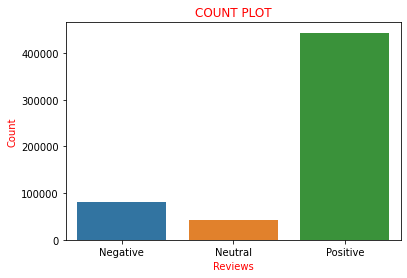

In [ ]:
sns.countplot(a)
plt.xlabel('Reviews', color = 'red')
plt.ylabel('Count', color = 'red')
plt.xticks([0,1,2],['Negative','Neutral','Positive'])
plt.title('COUNT PLOT', color = 'r')
plt.show()

In [ ]:
df['sentiment']=a
final_dataset = df[['Text','sentiment']]
final_dataset
final_dataset.count

<bound method DataFrame.count of                                                      Text  sentiment
0       I have bought several of the Vitality canned d...          2
1       Product arrived labeled as Jumbo Salted Peanut...          0
2       This is a confection that has been around a fe...          2
3       If you are looking for the secret ingredient i...          0
4       Great taffy at a great price.  There was a wid...          2
...                                                   ...        ...
568449  Great for sesame chicken..this is a good if no...          2
568450  I'm disappointed with the flavor. The chocolat...          0
568451  These stars are small, so you can give 10-15 o...          2
568452  These are the BEST treats for training and rew...          2
568453  I am very satisfied ,product is as advertised,...          2

[568411 rows x 2 columns]>

In [ ]:
datap = df.iloc[np.random.randint(1,443766,10000), :]
datan = df.iloc[np.random.randint(1, 124645,10000), :]
len(datan), len(datap)

(10000, 10000)

In [ ]:
data = pd.concat([datap,datan])
len(data)

20000

In [ ]:
c=[]
oneVal= []
for i in df['sentiment']:
    if i==0:
        c.append(0)
    if i==2:
        c.append(1)
    if i==1:
        oneVal.append(7)
print("count of c:")
len(c)



count of c:


525773

In [ ]:
print("count of nutrl val")
len(oneVal)

count of nutrl val


42638

In [ ]:
set(df['sentiment'])

{0, 1, 2}

In [ ]:
df =df.truncate(after=525813)
set(df['sentiment'])

{0, 1, 2}

### Review sentiment:
-  0: Negative
-  1: Positive

c:\users\rambaksh prajapati\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


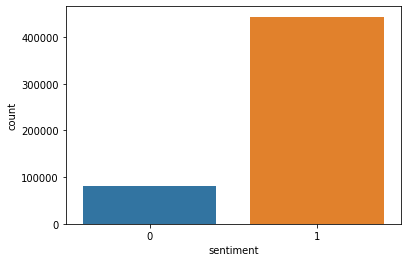

In [ ]:
df['sentiment'] = c
sns.countplot(df['sentiment'])
plt.show()

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
df['review'] = df['Text'].apply(strip_html)
df=df.drop('Text',axis=1)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,sentiment,review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,1,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,0,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",1,This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,0,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,1,Great taffy at a great price. There was a wid...


### Cleaning english punctuation from reviews

In [ ]:
import nltk
def punc_clean(text):
    import string as st
    a=[w for w in text if w not in st.punctuation]
    return ''.join(a)
df['review'] = df['review'].apply(punc_clean)
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,sentiment,review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,1,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,0,Product arrived labeled as Jumbo Salted Peanut...


### NLTK english stopwords download and removal 

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Rambaksh
[nltk_data]     Prajapati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Rambaksh
[nltk_data]     Prajapati\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def remove_stopword(text):
    stopword=nltk.corpus.stopwords.words('english')
    stopword.remove('not')
    a=[w for w in nltk.word_tokenize(text) if w not in stopword]
    return ' '.join(a)
df['review'] = df['review'].apply(remove_stopword)

### TFIDF vectorization and feature generation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectr = TfidfVectorizer(ngram_range=(1,2),min_df=1)
vectr.fit(df['review'])
vect_X = vectr.transform(df['review'])

## Building model to classify sentiments as 0: Negative and 1: Positive

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 100,  class_weight={1: 0.2, 0: 0.80})
clf= model.fit(vect_X,df['sentiment'])
clf.score(vect_X,df['sentiment'])*100

c:\users\rambaksh prajapati\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


86.76786369783157

### Predict reviews sentiments

In [ ]:
clf.predict(vectr.transform(["'grocery store'"]))

array([1], dtype=int64)

In [ ]:
clf.predict(vectr.transform(["'green'"]))

array([1], dtype=int64)

In [ ]:
clf.predict(vectr.transform(["tea"]))

array([1], dtype=int64)

In [ ]:
clf.predict(vectr.transform(["bad"]))

array([0], dtype=int64)

In [ ]:
clf.predict(vectr.transform(["''"]))

array([0], dtype=int64)

In [ ]:
clf.predict(vectr.transform(["don't"]))

array([0], dtype=int64)

### Wordnet Generation and discplay

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Rambaksh
[nltk_data]     Prajapati\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()

def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [ ]:
import re
corpus = text_transformation(df['review'])

In [ ]:
from wordcloud import WordCloud

word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

![download.png](attachment:download.png)

### Suggest Top five products for the investment bracket, with a detailed report using sentimental analysis on those product reviews.

Based on the sentiment analysis, we were able to find:
- Grocery items as top products for investement 
1. Tea leafes
2. Green vegetables
3. dog food and products
4. peanut and butter
5. gluten free products